# 超密度符号化（Superdense Coding）

この notebook では量子コンピューティングにおける超密度符号化（Superdense Coding: SDC）を紹介します。まず初めに作成した量子回路を Qiskit のシミュレーターを使ってテストし、実際の量子コンピューターで動かしてみます。

## 目次

1. [超密度符号化と量子テレポーテーション](#difference)
2. [処理手順](#process)    
    2.1 [Step 1](#step1)    
    2.2 [Step 2](#step2)    
    2.3 [Step 3](#step3)
3. [超密度符号化プロトコルのシミュレーション](#simulating)    
    3.1 [3.1 測定の可視化](#visualising)    
4. [実際の量子コンピューターにおける超密度符号化](#real_qc)


## 1. 超密度符号化と量子テレポーテーションの違い <a id='difference'></a>

量子テレポーテーションと超密度符号化は密接に関係しているので、適切に説明・区別なしには混乱を引き起こすでしょう。

量子テレポーテーションとは、２ビットの古典通信と Bell pair を利用して、量子ビット ($|\psi\rangle$) の状態をある場所から他の場所へ送信するプロトコルの事です。言い換えれば、共有されたエンタングルメントを利用してある場所に存在する量子ビットの量子状態を破壊し、離れた場所に作り直すプロトコルとも言えます。対して超密度符号化とは、１つの量子ビット通信を使用して、２つの古典ビットを誰かが別のグループに送信できるようにする手続きの事です。

| 量子テレポーテーション                           | 超密度符号化                                     |
|:----------------------------------------------:|:-----------------------------------------------:|
| ２つの古典ビットを使って<br>１つの量子ビットを転送 | １つの量子ビットを使って<br>２つの古典ビットを転送 |

つまり、テレポーテーション・プロトコルは超密度符号化の反転バージョンであり、アリスとボブが最初の持ち物を交換しただけ、ともみなせます。




## 2. 処理手順 <a id='process'></a>

![image1](images/superdense.jpg)

### 2.1 Step 1 <a id='step1'></a>
手順はある第三者、チャーリーから始まります。チャーリーはエンタングルした状態にある２量子ビットを用意します。まず彼は、基底状態 $|0\rangle$ の２量子ビットから始めます。そして１つ目の量子ビットにアダマールゲート（ $H$ ）を作用させて重ね合わせ状態を作ります。その後、１つ目の量子ビットをコントロール・ビット、２つめをターゲット・ビットとして CNOT ゲート（ $CX$ ）を作用させます。このエンタングルした状態が、以前私たちが触れた Bell pair です。


#### 出力結果

チャーリーは初めにアダマールゲートを作用させます。

$H$ ゲートが１つ目の量子ビットに作用すると重ね合わせ状態に遷移し、次の状態が得られることになります：


$$|0+\rangle  =  \tfrac{1}{\sqrt{2}}(|00\rangle + |01\rangle)$$

その後、チャーリーは CNOT ゲートを作用させます。CNOT ゲートは２つの量子ビットをエンタングルさせるので、もしコントロール・ビットが $|1\rangle$ ならばターゲット・ビットが反転します。 ケットの右側の量子ビットがコントロール・ビットである事に注意しましょう。


$$\text{CNOT} \tfrac{1}{\sqrt{2}}(|00\rangle + |01\rangle) = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

### 2.2 Step 2 <a id='step2'></a>

チャーリーは１つ目の量子ビットをアリスに、２つ目をボブに送ります。この手順の目標は、アリスが彼女の持っている量子ビットを使って、２つの古典ビット情報をボブに送信することです。しかしその前にアリスは、彼女が送信したい２ビットの情報に応じて、彼女の持つ量子ビットにいくつかのゲートの組を作用させる必要があります。


超密度符号化の変換規則（アリスの手順）
<!--- Table does not render properly when built to html. This is a problem with nbconvert. Replaced with image
| 送りたい情報 | 作用させるゲート | 作用結果の状態 ($\cdot\sqrt{2}$)|
|:----------------:|:------------:|:--------------------------------:|
|00                |$I$           | $|00\rangle + |11\rangle$        |
|10                |$X$           | $|01\rangle + |10\rangle$        |
|01                |$Z$           | $|00\rangle - |11\rangle$        |
|11                |$ZX$          | $|10\rangle - |01\rangle$        |
--->


![image2](images/superdense_table1.png)<br>

従って、もしアリスが 00 を送りたいならば、彼女は自分の量子ビットには何も作用させません（恒等ゲート（ $I$ ）を作用させます）し、10 ならば、$X$ ゲートを作用させます。何を送りたいかによって、それに応じたゲートを作用させればよいのです。それが完了したら、アリスは彼女の量子ビットをボブに送り、手順の最終ステップに進みます。


### 2.3 Step 3 <a id='step3'></a>

ボブは（右側の量子ビットである）アリスの量子ビットを受け取り、彼の量子ビットを使ってアリスのメッセージを復号します。復号の際、ボブは何の情報も必要としない事に注意してください。彼に必要なのは、つぎに示す復号手順の知識だけです。


ボブは、右側の量子ビットをコントロール・ビット、左側をターゲット・ビットとして CNOT ゲートを作用させます。そしてアダマールゲートを作用させ、最後に両方の量子ビットを観測する事で、アリスのメッセージを取り出すことが出来ます。

<!--- Table does not render properly when built to html. Replaced with image 
| Bob Recieves:             | After CNOT-gate:          | After H-gate:  |
|:-------------------------:|:-------------------------:|:--------------:|
| $|00\rangle + |11\rangle$ | $|00\rangle + |01\rangle$ | $|00\rangle$   |
| $|01\rangle + |10\rangle$ | $|10\rangle + |11\rangle$ | $|10\rangle$   |
| $|00\rangle - |11\rangle$ | $|00\rangle - |01\rangle$ | $|01\rangle$   |
| $|10\rangle - |01\rangle$ | $|11\rangle - |10\rangle$ | $|11\rangle$   |
--->

![image3](images/superdense_table2.png)<br>

ボブが観測を行うと、彼はアリスが彼に送ったメッセージを確実に受け取ります。この最後の結果は実際には $-|11\rangle$ ですが $|11\rangle$ と書かれていることに注意してください。グローバル位相は観測に影響しないからです。


## 3. 超密度符号化プロトコルのシミュレーション <a id='simulating'></a>


In [1]:
# 必要なすべてのライブラリをインポートします
from qiskit import QuantumCircuit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

量子エンタングルのペアを作るには、$H$ ゲートの後に CNOT ゲートが必要である事はわかっています。なので、`QuantumCircuit` を引数にもち、インデックス `a` , `b` で表される２つの量子ビットをエンタングルさせる関数を作りましょう。

In [2]:
# QuantumCircit (qc) と２つの整数 (a,b) を引数にとる関数を定義します。
def create_bell_pair(qc, a, b):
    qc.h(a) # １つめの量子ビットに H ゲートを作用させます。
    qc.cx(a, b) # １つめの量子ビットをコントロール・ビットとして、CNOT ゲートを作用させます。

次に、メッセージを符号化しましょう。次の4つのメッセージ（`00`, `10`, `01`, `11`）が送信できる事はわかっています。なので、このメッセージを引数に取り、対応するゲートを作用させるような関数を作りましょう。

In [3]:
# QuantumCircuit (qc)、量子ビットの添え字（ qubit ）、
# メッセージの文字列（ msg ）を引数にとる関数を定義します
def encode_message(qc, qubit, msg):
    if msg == "00":
        pass    # 00 を送信するには何もしません
    elif msg == "10":
        qc.x(qubit) # 10 を送信するには X-ゲートを作用させます
    elif msg == "01":
        qc.z(qubit) # 01 を送信するには Z-ゲートを作用させます
    elif msg == "11":
        qc.z(qubit) # 11 を送信するには、Zゲートを作用させた後に
        qc.x(qubit) # Xゲートを作用させます
    else:
        print("Invalid Message: Sending '00'")

最後に、メッセージを復号します。CNOT ゲートの後に $H$ ゲートを作用させれば復号できる事はわかっているので、これについても関数を作りましょう。

In [4]:
def decode_message(qc, a, b):
    qc.cx(a,b)
    qc.h(a)

これらを使って最終的な手順を完成させましょう。

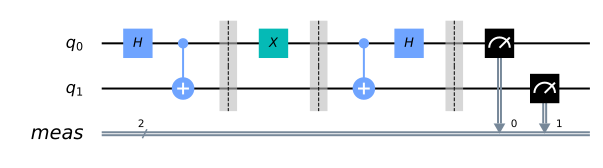

In [5]:
# 2量子ビット回路を作成します
qc = QuantumCircuit(2)

# まず、イブがアリスとボブに渡す量子エンタングルペアを作ります
# First, Charlie creates the entangled pair between Alice and Bob
create_bell_pair(qc, 0, 1)
qc.barrier() # ここでは回路に「バリア（仕切り）」を挿入します。
             #「バリア」はダイアグラム内のゲートを分離し、
             # 回路のどの部分がどのようなものかを明確にします
             # （回路をビジュアライズするとどのようなものかわかるでしょう）

# ここで、量子ビット_0 をアリスへ、量子ビット_1 をボブに送ります

# 次に、アリスは彼女のメッセージを 量子ビット_0 上に符号化します。
# 今回は '10' を送りたいしましょう。
# 読者自身でこの値を変更し、それが回路にどう影響するかを見ることもできます

message = "10"
encode_message(qc, 0, message)
qc.barrier()
# そうしたら、アリスは自分の量子ビットをボブに送ります。

# ボブは 量子ビット_0 を受け取ったら、復号手順を適応します。
decode_message(qc, 0, 1)

# 最後に、ボブが彼の量子ビットを測定することでアリスのメッセージを取得します
qc.measure_all()

# 出力を描画しましょう
qc.draw(output = "mpl")

### 3.1 測定の可視化 <a id='visualising'></a>

{'10': 1024}


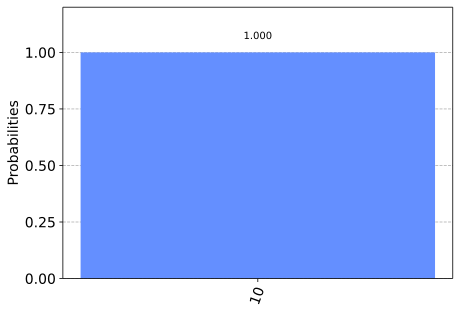

In [6]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

シミュレーターでは完全な量子コンピューターがシミュレートされます。正しいメッセージが、エラーなしに 100% の確率で測定できる事がわかります。

## 4. 実際の量子コンピューターにおける超密度符号化 <a id='real_qc'></a>


それでは、実際の量子コンピューター上で超密度符号化がどのように動作するのかを見ていきましょう。

まずは自分たちのアカウントを読み込んで、最も空いている量子システムを取得します。

In [7]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 1024

# ローカルアカウントの情報を取得します
IBMQ.load_account()
# 最も空いているバックエンドを取得します
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
# 回路を実行します
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)

least busy backend:  ibmq_london


In [8]:
# ジョブをモニタリングします
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


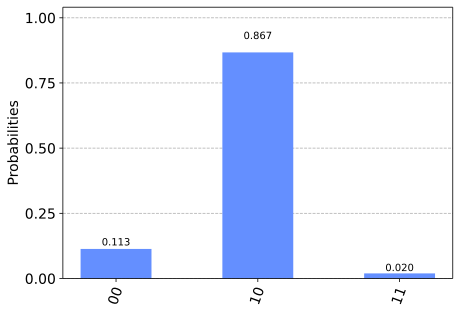

In [9]:
# 結果をプロットします
result = job.result()
plot_histogram(result.get_counts(qc))

このように実際の量子コンピューターで実行すると、他の３つの状態も観測結果として現れます。量子ゲートのエラーと量子ビットのデコヒーレンスによるエラーが原因で起こるものです。これらのエラーについては後の章で詳しく学習することになるでしょう。

In [10]:
correct_results = result.get_counts(qc)[message]
accuracy = (correct_results/shots)*100
print(f"Accuracy = {accuracy:.2f}%")

Accuracy = 86.72%


In [11]:
import qiskit.tools.jupyter
%qiskit_version_table

{'qiskit-terra': '0.14.2',
 'qiskit-aer': '0.5.2',
 'qiskit-ignis': '0.3.3',
 'qiskit-ibmq-provider': '0.7.2',
 'qiskit-aqua': '0.7.3',
 'qiskit': '0.19.6'}